<a href="https://colab.research.google.com/github/Preethamreddy9/Arificial-Neural-Network-Lab/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Linear')

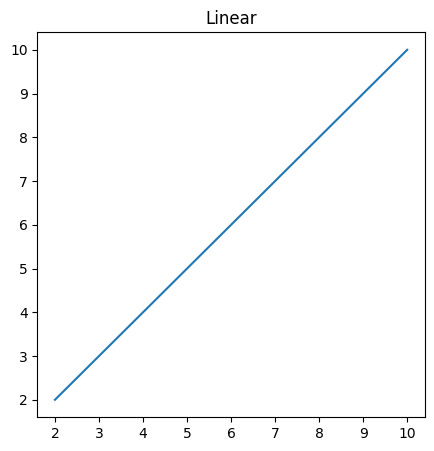

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def linear(x):
  return x
x = np.linspace( 2, 10)
plt.figure(figsize=(5,5))
plt.plot(x,linear(x))
plt.title('Linear')


Text(0.5, 1.0, 'bipolar sigmoid and sigmoid')

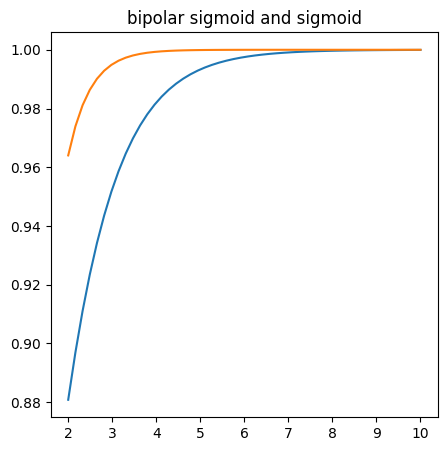

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x))
def bipolar_sigmoid(x):
  return 2/(1+np.exp(-2*x))-1
x = np.linspace( 2, 10)
plt.figure(figsize=(5,5))
plt.plot(x,sigmoid(x))
plt.plot(x,bipolar_sigmoid(x))
plt.title('bipolar sigmoid and sigmoid')


Text(0.5, 1.0, 'relu')

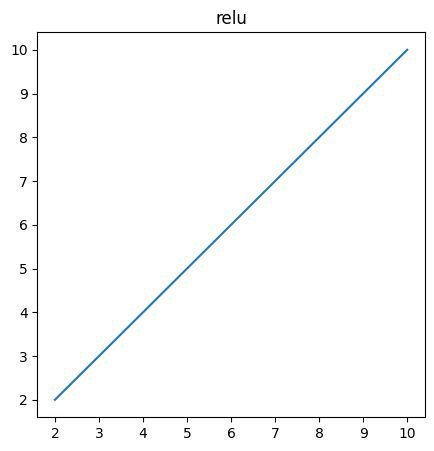

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def relu(x):
  return np.maximum(0,x)
x = np.linspace( 2, 10)
plt.figure(figsize=(5,5))
plt.plot(x,relu(x))
plt.title('relu')

Text(0.5, 1.0, 'Leaky Relu')

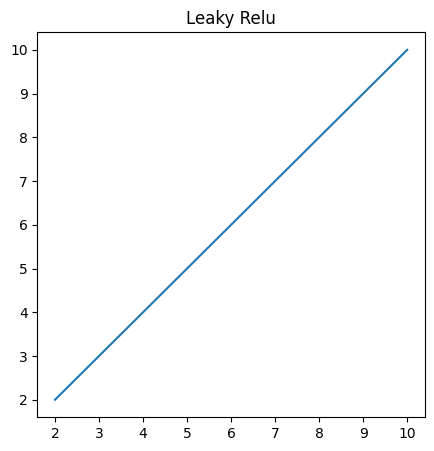

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def leaky_relu(x):
  return np.maximum(0.1*x,x)
x = np.linspace( 2, 10)
plt.figure(figsize=(5,5))
plt.plot(x,leaky_relu(x))
plt.title('Leaky Relu')

Text(0.5, 1.0, 'tanh')

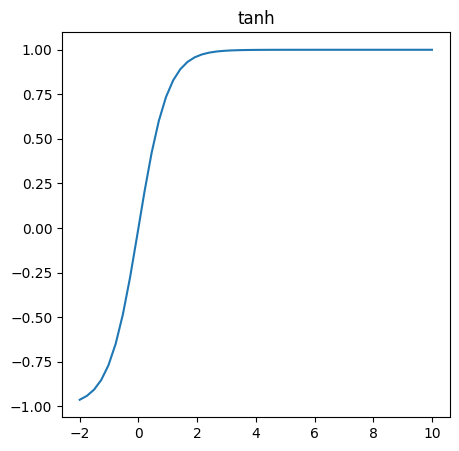

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
  return np.tanh(x)
x = np.linspace( -2, 10)
plt.figure(figsize=(5,5))
plt.plot(x,tanh(x))
plt.title('tanh')

Text(0.5, 1.0, 'softmax')

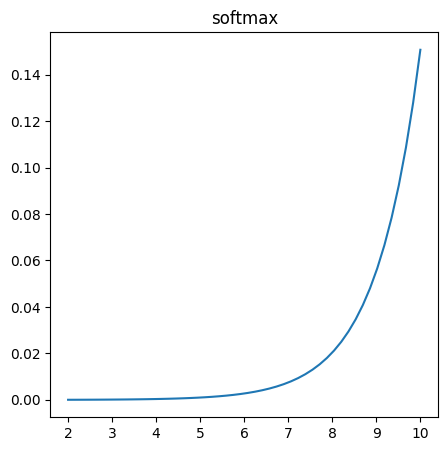

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

x = np.linspace( 2, 10)
plt.figure(figsize=(5,5))
plt.plot(x,softmax(x))
plt.title('softmax')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Assuming dataset.csv is the file containing the data
data = pd.read_csv('dataset.csv')

# Inspect the dataset
print(data.head())

# Preprocess the data
# Encode the 'State' column using OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['State'])], remainder='passthrough')
data = np.array(ct.fit_transform(data))

# Split the data into features (X) and target (y)
X = data[:, :-1]  # All columns except the last one
y = data[:, -1]   # The last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and fit the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # Line for comparison
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
x = np.array([10, 15, 20, 25, 30]).reshape(-1, 1)
y = np.array([20, 25, 30, 35, 40])

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)

# Coefficients
a = model.coef_[2]
b = model.coef_[1]
c = model.intercept_

print(f"Coefficient of x^2 (a): {a}")
print(f"Coefficient of x (b): {b}")
print(f"Intercept (c): {c}")

# Plotting
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x_poly), color='red')
plt.xlabel('Number of Boys')
plt.ylabel('Total Number of Students')
plt.title('Polynomial Regression Example (Degree 2)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Handling missing values in the training set
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Convert categorical variables to numerical in the training set
# Keep the original 'Sex' column for visualization
train_data_encoded = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Features and target variable in the training set
X_train = train_data_encoded.drop('Survived', axis=1)
y_train = train_data_encoded['Survived']

# Handling missing values in the test set
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Convert categorical variables to numerical in the test set
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)
# Visualizing the relationship between features and survival

# Survival count
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_data) # Use the original train_data here
plt.title('Survival Count')
plt.show()

# Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data) # Use the original train_data here
plt.title('Survival by Gender')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_data) # Use the original train_data here
plt.title('Survival by Passenger Class')
plt.show()

# Age distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True) # Use the original train_data here
plt.title('Age Distribution by Survival')
plt.show()

# Fare distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', kde=True) # Use the original train_data here
plt.title('Fare Distribution by Survival')
plt.show()

# Survival by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Embarked', data=train_data) # Use the original train_data here
plt.title('Survival by Embarked')
plt.show()

# Pairplot of all features
plt.figure(figsize=(10, 6))
sns.pairplot(train_data, hue='Survived', diag_kind='kde', markers=["o", "s"]) # Use the original train_data here
plt.suptitle('Pairplot of Features Colored by Survival', y=1.02)
plt.show()

# Ensure the test set has the same features as the training set
X_test = test_data

# Ensure the test set has the same features as the training set
X_test = test_data

# Check for and handle any remaining NaN values in X_test
# This is crucial for LinearRegression
X_test.fillna(X_test.median(), inplace=True)  # Fill any remaining NaN with median

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_train[:len(y_pred_linear)], y_pred_linear)  # Adjusted to fit the available data

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_train[:len(y_pred_poly)], y_pred_poly)  # Adjusted to fit the available data

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_train[:len(y_pred_logistic)], y_pred_logistic)  # Adjusted to fit the available data

# Comparison
print(f'Linear Regression MSE: {mse_linear}')
print(f'Polynomial Regression (Degree 2) MSE: {mse_poly}')
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_train[:len(y_pred_logistic)], y_pred_logistic))
print('Logistic Regression Classification Report:')
print(classification_report(y_train[:len(y_pred_logistic)], y_pred_logistic))

# Summary DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)', 'Logistic Regression'],
    'MSE': [mse_linear, mse_poly, np.nan],
    'Accuracy': [np.nan, np.nan, accuracy_logistic]
})

print(comparison_df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('wheat-seeds.csv')

# Display the first few rows of the dataset
print(data.head())
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable (type of wheat seed)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create the Decision Tree classifier with entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Convert class names to strings
class_names = [str(c) for c in clf.classes_]

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names) # Use the converted class names
plt.show()

In [ ]:
import panda as pd
import numpy as np
x = np.array([-1,-1,1],
               [1, 1, 1],
               [1,-1,1],
               [-1,1,-1])
y = np.array([-1,-1,-1,1])
w = np.zeros(x.shape[1])
def hibbian(x,y)
hibbian_data = pd.read_csv('hibbian_data.csv')